In [1]:
import pandas as pd

df_news_final_project = pd.read_parquet(
    'https://storage.googleapis.com/msca-bdp-data-open/news_final_project/news_final_project.parquet',
    engine='pyarrow'
)

# Shape and columns
print("Shape:", df_news_final_project.shape)
print("Columns:", df_news_final_project.columns)

# Sample of rows
df_news_final_project.sample(5, random_state=13)


Shape: (200760, 5)
Columns: Index(['url', 'date', 'language', 'title', 'text'], dtype='object')


,url,date,language,title,text
40702,https://freedombunker.com/2023/02/11/decoding-...,2023-02-12,en,Decoding Google’s AI Ambitions (And Anxiety),Decoding Google’s AI Ambitions (And Anxiety) ...
32567,https://www.eweek.com/news/microsoft-openai-uk...,2025-03-07,en,UK Says OK to $13B Microsoft-OpenAI Deal: What...,\n\nUK Says OK to $13B Microsoft-OpenAI Deal:...
200740,https://www.wflx.com/prnewswire/2022/05/27/new...,2022-05-27,en,New Studies at ASCO 2022 Validate Effectivenes...,New Studies at ASCO 2022 Validate Effectivenes...
43393,https://www.einpresswire.com/article/812138741...,2025-05-13,en,Command Alkon’s Batch AI Honored as a 2025 ...,\n Command Alkon’s Batch AI Honored as a 2025...
174840,https://www.cyclingweekly.com/products/can-huu...,2022-11-03,en,Can Huub's £400 heated trousers really improve...,\n\nCan Huub's £400 heated trousers really imp...


In [2]:
# Date range
print("Date range:", df_news_final_project['date'].min(), "→", df_news_final_project['date'].max())

# Language distribution
print("Language breakdown:\n", df_news_final_project['language'].value_counts())

# Missing data
print("Missing values:\n", df_news_final_project.isna().sum())

# Title and text length
df_news_final_project['title_len'] = df_news_final_project['title'].str.len()
df_news_final_project['text_len'] = df_news_final_project['text'].str.len()
print(df_news_final_project[['title_len', 'text_len']].describe())

# Duplicate titles or URLs
print("Duplicate URLs:", df_news_final_project.duplicated(subset='url').sum())
print("Duplicate Titles:", df_news_final_project.duplicated(subset='title').sum())

# Sample titles to get a feel
print("\nRandom sample of titles:\n", df_news_final_project['title'].sample(10, random_state=2).tolist())

Date range: 2022-01-01 → 2025-07-22
Language breakdown:
 language
en    200760
Name: count, dtype: int64
Missing values:
 url         0
date        0
language    0
title       0
text        0
dtype: int64
           title_len       text_len
count  200760.000000  200760.000000
mean       86.681441    8836.390815
std        39.327998    7097.549102
min         6.000000      21.000000
25%        66.000000    5142.000000
50%        82.000000    7386.000000
75%       102.000000   11034.000000
max      8250.000000  583570.000000
Duplicate URLs: 0
Duplicate Titles: 41589

Random sample of titles:
 ['Ang Intel Naglunsad sa Bag-ong AI Chips, Nakigsangka sa Nvidia ug AMD', 'OrionStar USA Integrates Lucki with ChatGPT, Revolutionizing the Hospitality Industry with AI', 'Better AI Stock: Nvidia vs. C3.ai | Nasdaq', '         PEXA Group - AI Assistant | Thoughtworks Chile     ', 'PONY AI Inc. and Tencent Cloud Announce Strategic Partnership to Advance Autonomous Driving Technology and Robotaxi Comm

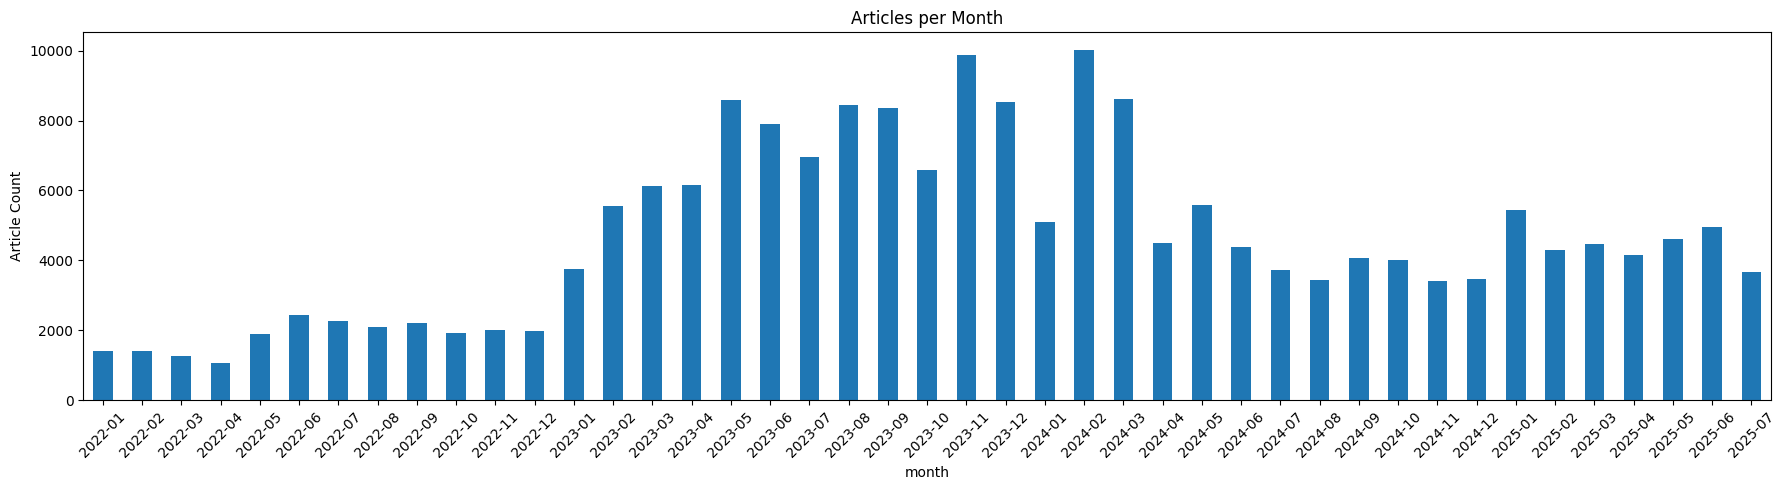

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

df_news_final_project['date'] = pd.to_datetime(df_news_final_project['date'])
df_news_final_project['month'] = df_news_final_project['date'].dt.to_period('M')

# Plot article volume by month
monthly_counts = df_news_final_project['month'].value_counts().sort_index()
monthly_counts.plot(kind='bar', figsize=(18, 5), title='Articles per Month')
plt.ylabel("Article Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

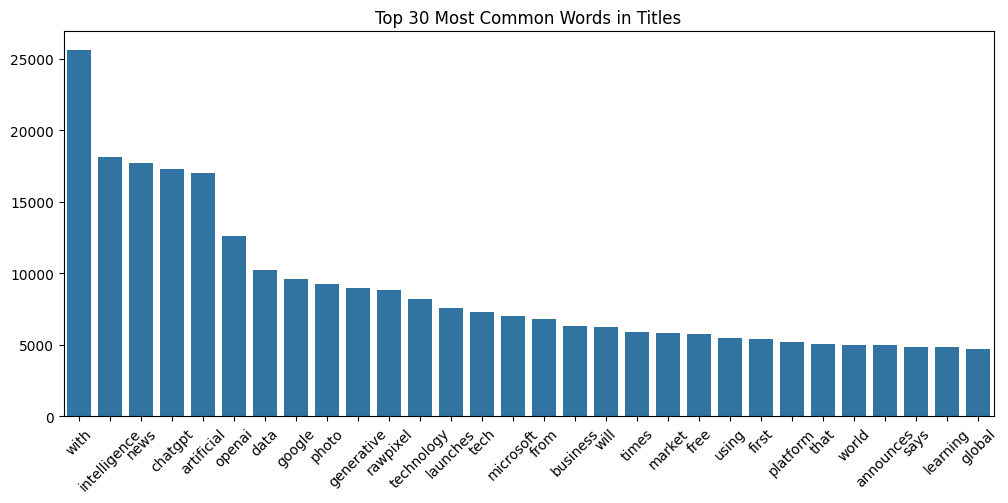

In [4]:
from collections import Counter
import re

# Simple tokenizer
def tokenize(text):
    return re.findall(r'\b\w{4,}\b', text.lower())  # skip short words (<4 chars)

title_words = df_news_final_project['title'].dropna().apply(tokenize)
flat_title_words = [word for sublist in title_words for word in sublist]
word_freq = Counter(flat_title_words)
top_30 = word_freq.most_common(30)

# Plot
words, counts = zip(*top_30)
plt.figure(figsize=(12,5))
sns.barplot(x=list(words), y=list(counts))
plt.title("Top 30 Most Common Words in Titles")
plt.xticks(rotation=45)
plt.show()

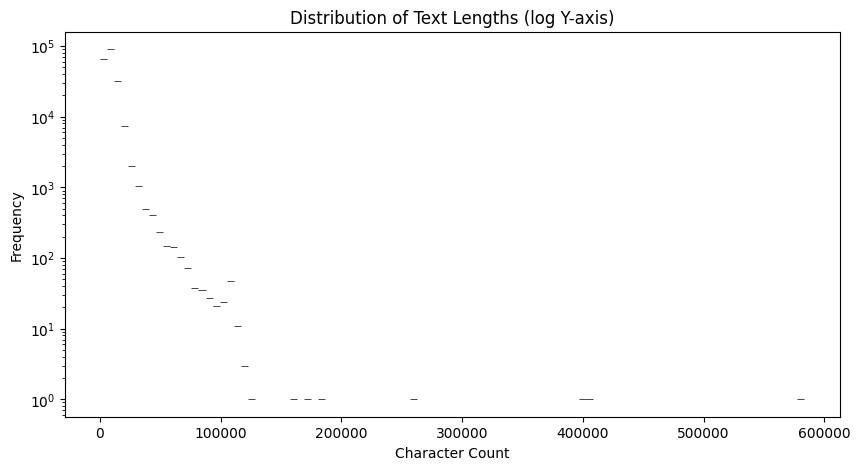

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(df_news_final_project['text_len'], bins=100, log_scale=(False, True))
plt.title("Distribution of Text Lengths (log Y-axis)")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()

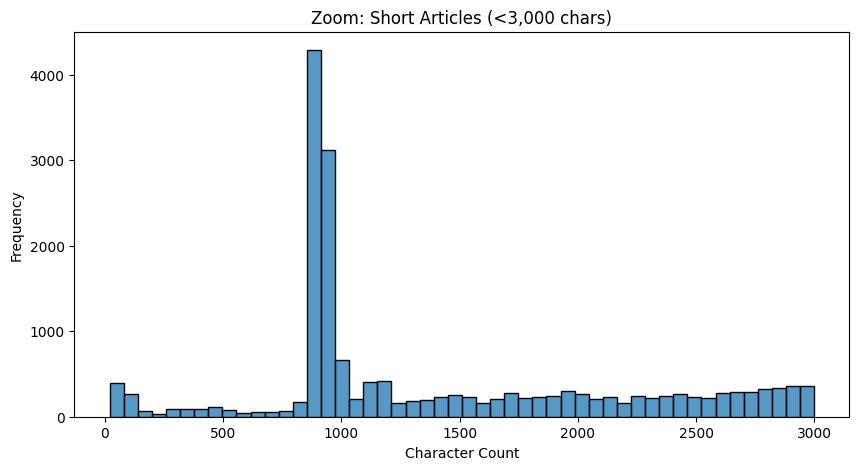

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(df_news_final_project[df_news_final_project['text_len'] < 3000]['text_len'], bins=50)
plt.title("Zoom: Short Articles (<3,000 chars)")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()

In [8]:
# Sample suspicious lines
weird_snippets = df_news_final_project['text'].sample(100, random_state=3).tolist()

for i, text in enumerate(weird_snippets[:5]):
    print(f"\n==== Sample {i+1} ====\n")
    print(text[:1000])  # truncate for readability


==== Sample 1 ====

Adult women undergarment headphones. AI | Free Photo Illustration - rawpixelrawpixelElementsDesignsDesign topicsElement topicsBoardshttps://www.rawpixel.com/services/licenseshttps://www.rawpixel.com/image/12218652Edit ImageSaveSaveEditCropCustom Textchu_chutimaShare : Exclusive to rawpixel.comKeywords :cartoonpersonaestheticheadphonesillustrationwomenminimalyogaAdult women undergarment headphones. AI generated Image by rawpixel.MoreAI GeneratedFreeRoyalty Free PhotoID : 12218652View LicenseJPEGSmall JPEG 1200 x 800 px | 300 dpiLarge JPEG 3500 x 2333 px | 300 dpi Best Quality JPEG 6720 x 4480 px | 300 dpiFree Download©2023 Rawpixel Ltd.Adult women undergarment headphones. AI generated Image by rawpixel.MoreWant to get in touch? We’d love to hear from you!contact@rawpixel.comjoin our Discord channel©2024 Rawpixel Ltd.User TermsPrivacy Cookie PolicyPricingAboutLicensesCreativity for GoodFAQJoin usimagine, create, remix

==== Sample 2 ====

DDN Launches Infinia Next-Ge

In [8]:
crawl_junk = ['\\n', 'rawpixel', 'image credit', 'premium photo', 'shutterstock', 'adobe stock']

for junk in crawl_junk:
    count = df_news_final_project['text'].str.contains(junk, case=False).sum()
    print(f"{junk}: {count}")

\n: 178109
rawpixel: 8926
image credit: 5024
premium photo: 4434
shutterstock: 4023
adobe stock: 715


In [9]:
ai_keywords = [
    'artificial intelligence', 'ai', 'machine learning', 'deep learning',
    'chatgpt', 'openai', 'generative ai', 'gpt-3', 'gpt-4', 'transformer',
    'copilot', 'llm', 'large language model', 'bert', 'autogen'
]

# Lowercase text
df_news_final_project['text_lower'] = df_news_final_project['text'].str.lower()

# Count keyword hits
for keyword in ai_keywords:
    count = df_news_final_project['text_lower'].str.contains(keyword).sum()
    print(f"{keyword}: {count}")

artificial intelligence: 129386
ai: 200297
machine learning: 32754
deep learning: 8189
chatgpt: 56929
openai: 48762
generative ai: 47714
gpt-3: 3611
gpt-4: 9728
transformer: 2787
copilot: 8226
llm: 22181
large language model: 20569
bert: 18563
autogen: 140


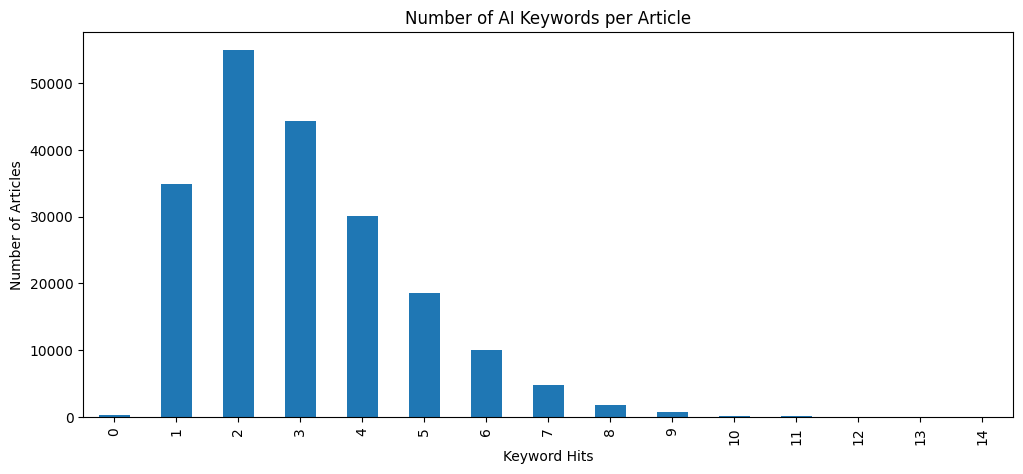

In [10]:
import numpy as np

def count_keyword_hits(text):
    return sum(1 for kw in ai_keywords if kw in text)

df_news_final_project['keyword_count'] = df_news_final_project['text_lower'].apply(count_keyword_hits)
df_news_final_project['keyword_count'].value_counts().sort_index().plot(
    kind='bar', title='Number of AI Keywords per Article', figsize=(12,5)
)
plt.xlabel("Keyword Hits")
plt.ylabel("Number of Articles")
plt.show()

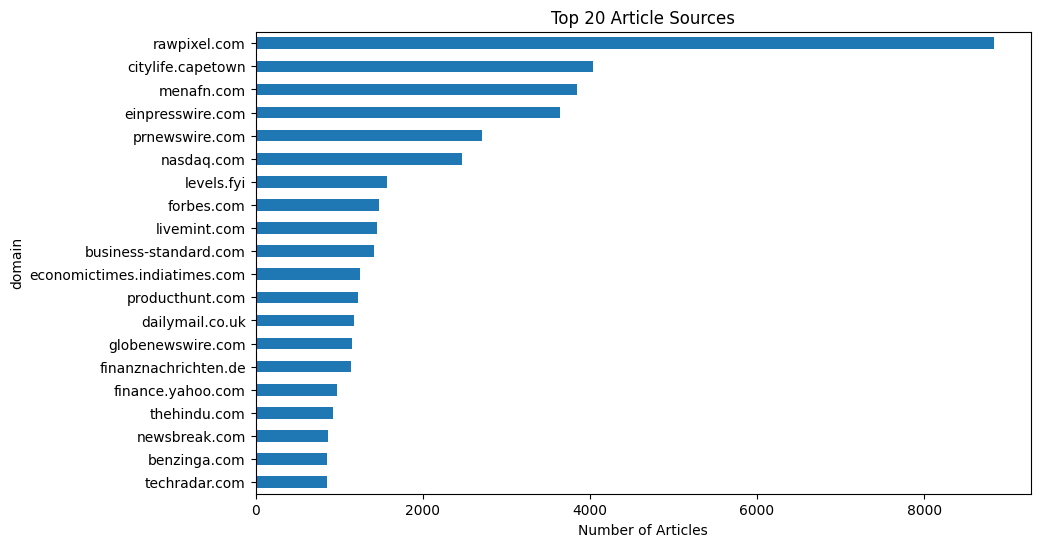

In [11]:
df_news_final_project['domain'] = df_news_final_project['url'].str.extract(r'https?://(?:www\.)?([^/]+)/')

top_sources = df_news_final_project['domain'].value_counts().head(20)
top_sources.plot(kind='barh', figsize=(10,6), title="Top 20 Article Sources")
plt.xlabel("Number of Articles")
plt.gca().invert_yaxis()
plt.show()


In [13]:
print("Data shape:", df_news_final_project.shape)
print("Column types:\n", df_news_final_project.dtypes)
print("Language counts:\n", df_news_final_project['language'].value_counts())
print("Missing values:\n", df_news_final_project.isna().sum())
print("Duplicates:")
print("- Duplicate URLs:", df_news_final_project.duplicated('url').sum())
print("- Duplicate Titles:", df_news_final_project.duplicated('title').sum())

# Length metrics
df_news_final_project['title_len'] = df_news_final_project['title'].str.len()
df_news_final_project['text_len'] = df_news_final_project['text'].str.len()
df_news_final_project[['title_len', 'text_len']].describe()


Data shape: (200760, 11)
Column types:
 url                      object
date             datetime64[ns]
language                 object
title                    object
text                     object
title_len                 int64
text_len                  int64
month                 period[M]
text_lower               object
keyword_count             int64
domain                   object
dtype: object
Language counts:
 language
en    200760
Name: count, dtype: int64
Missing values:
 url              0
date             0
language         0
title            0
text             0
title_len        0
text_len         0
month            0
text_lower       0
keyword_count    0
domain           0
dtype: int64
Duplicates:
- Duplicate URLs: 0
- Duplicate Titles: 41589


,title_len,text_len
count,200760.000000,200760.000000
mean,86.681441,8836.390815
std,39.327998,7097.549102
min,6.000000,21.000000
25%,66.000000,5142.000000
50%,82.000000,7386.000000
75%,102.000000,11034.000000
max,8250.000000,583570.000000


In [14]:
df_news_final_project['date'] = pd.to_datetime(df_news_final_project['date'], errors='coerce')
print("Date range:", df_news_final_project['date'].min(), "→", df_news_final_project['date'].max())
print("Articles per year:\n", df_news_final_project['date'].dt.year.value_counts().sort_index())
print("Articles per month:\n", df_news_final_project['date'].dt.to_period('M').value_counts().sort_index().tail(12))


Date range: 2022-01-01 00:00:00 → 2025-07-22 00:00:00
Articles per year:
 date
2022    21974
2023    86852
2024    60353
2025    31581
Name: count, dtype: int64
Articles per month:
 date
2024-08    3447
2024-09    4076
2024-10    4021
2024-11    3406
2024-12    3453
2025-01    5433
2025-02    4303
2025-03    4465
2025-04    4155
2025-05    4607
2025-06    4957
2025-07    3661
Freq: M, Name: count, dtype: int64


In [15]:
print("Title Lengths:")
print(df_news_final_project['title_len'].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.95, 0.99]))

print("Text Lengths:")
print(df_news_final_project['text_len'].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.95, 0.99]))


Title Lengths:
count    200760.000000
mean         86.681441
std          39.327998
min           6.000000
1%           34.000000
25%          66.000000
50%          82.000000
75%         102.000000
95%         141.000000
99%         184.000000
max        8250.000000
Name: title_len, dtype: float64
Text Lengths:
count    200760.000000
mean       8836.390815
std        7097.549102
min          21.000000
1%          868.000000
25%        5142.000000
50%        7386.000000
75%       11034.000000
95%       18484.000000
99%       33615.100000
max      583570.000000
Name: text_len, dtype: float64


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Top title unigrams
title_vec = CountVectorizer(stop_words='english', max_features=20)
title_counts = title_vec.fit_transform(df_news_final_project['title'])
title_vocab = title_vec.get_feature_names_out()
title_freqs = title_counts.sum(axis=0).A1
print("Top 20 title words:")
for word, freq in zip(title_vocab, title_freqs):
    print(f"{word}: {freq}")

# Top text unigrams
text_vec = CountVectorizer(stop_words='english', max_features=20)
text_counts = text_vec.fit_transform(df_news_final_project['text'].sample(10000))  # Use a sample for speed
text_vocab = text_vec.get_feature_names_out()
text_freqs = text_counts.sum(axis=0).A1
print("Top 20 text words:")
for word, freq in zip(text_vocab, text_freqs):
    print(f"{word}: {freq}")


Top 20 title words:
ai: 168982
artificial: 17045
business: 6326
chatgpt: 17307
com: 9226
data: 10233
generative: 8963
google: 9585
intelligence: 18146
launches: 7575
market: 5826
microsoft: 7032
new: 18160
news: 17707
openai: 12591
photo: 9266
rawpixel: 8831
tech: 7335
technology: 8212
times: 5898
Top 20 text words:
2023: 27452
2024: 19014
ai: 136717
artificial: 17363
business: 23878
company: 19193
content: 15793
data: 32442
intelligence: 20669
market: 21133
media: 20532
new: 38795
news: 59210
said: 20892
search: 14869
share: 19910
tech: 15381
technology: 28268
use: 17720
world: 18461


In [8]:
import spacy
nlp = spacy.load("en_core_web_sm")

sample_texts = df_news_final_project['text'].dropna().sample(5).tolist()
for i, doc in enumerate(nlp.pipe(sample_texts)):
    print(f"\n=== ARTICLE {i+1} ===")
    for ent in doc.ents:
        print(ent.text, ent.label_)



=== ARTICLE 1 ===
29 CARDINAL
2024,07:15am CARDINAL
Gridiron ORG
2024,07:15am CARDINAL
Three CARDINAL
2024,07:00am CARDINAL
Small-Business OwnersApr 29 ORG
2024,07:00am CARDINAL
EDTNavigating Data Breach Communication: A Blueprint For ExecutivesApr 29 ORG
2024,07:00am CARDINAL
ItApr 29 LAW
2024,07:00am CARDINAL
2024,07:00am EDTPublic Speaking MONEY
Forbes Councils ORG
the author.| Membership ORG
2024,07:15am CARDINAL
FacebookShare ORG
TwitterShare ORG
LinkedinCo-Founder of The Abbi Agency ORG
AI GPE
AI GPE
AI GPE
Oregon GPE
AI GPE
AI GPE
18 CARDINAL
The Back Of A Propeller Plane Shoots Down A Russian Drone WORK_OF_ART
AI GPE
Pacific coast LOC
the day DATE
AI ORG
AI GPE
AI GPE
seven CARDINAL
AI GPE
AI ORG
Forbes Agency Council ORG
Twitter PERSON
WhitakerEditorial StandardsPrintReprints & Permissions ORG

=== ARTICLE 2 ===
by@raymondcamden 360 CARDINAL
360 CARDINAL
Raymond CamdenMarch 1st PERSON
2024Too CARDINAL
Generative AI PERSON
Studio PERSON
0.9 CARDINAL
1 CARDINAL
1 CARDINAL
2048 

In [9]:
from textblob import TextBlob

df_sample = df_news_final_project['text'].dropna().sample(500)
sentiments = df_sample.apply(lambda x: TextBlob(x).sentiment.polarity)
print("Sentiment stats:")
print(sentiments.describe())


Sentiment stats:
count    500.000000
mean       0.138140
std        0.101526
min       -0.104938
25%        0.079500
50%        0.126740
75%        0.173994
max        0.600000
Name: text, dtype: float64


In [10]:
print("Top 5 longest texts:")
print(df_news_final_project.sort_values('text_len', ascending=False)[['url', 'text_len']].head())

print("Top 5 shortest texts:")
print(df_news_final_project.sort_values('text_len')[['url', 'text_len']].head())


Top 5 longest texts:
                                                      url  text_len
130128  https://www.nbcbayarea.com/news/national-inter...    583570
75029   https://progressivegrocer.com/exclusive-ces-20...    403133
71248   https://progressivegrocer.com/whats-state-ai-a...    401025
59451   https://hdsr.mitpress.mit.edu/pub/yixt9mqu/rel...    260287
184614  https://www.sentieridelcinema.it/spielberg-tri...    183291
Top 5 shortest texts:
                                                      url  text_len
17374   https://www.zeffy.com/fr-CA/ticketing/4d1cea5e...        21
197867  https://www.zeffy.com/ticketing/4d1cea5e-6934-...        21
137422  https://www.zeffy.com/ticketing/d466a687-879d-...        22
99721   https://www.zeffy.com/donation-form/47010d69-c...        26
143473  https://www.zeffy.com/fr-CA/donation-form/4701...        26
